# Dataset: Credit Card Approval Prediction
https://www.kaggle.com/rikdifos/credit-card-approval-prediction
Accessed 01-11-2020

In [1]:
# import libraries and data
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
applications_df = pd.read_csv('application_record.csv')

In [3]:
credit_df = pd.read_csv('credit_record.csv')

## Data Prep & Cleaning

In [4]:
# view application data dimensions and types
# we see that application dataset has 12 categorical series & 5 numeric
applications_df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
# view credit data dimensions and types
# we see that "ID" is the primary key between datasets, but that within first few records there are duplicates

# "months_balance" (numeric) description: "The month of the extracted data is the starting point, backwards, 
# 0 is the current month, -1 is the previous month, and so on"

# "status" (categorical) description: "0: 1-29 days past due 1: 30-59 days past due 
# 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month X: No loan for the month"

credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
# How many months back is included in credit dataset?
credit_df.MONTHS_BALANCE.min()

-60

In [7]:
# What % of total records falls into each credit status?
credit_df['STATUS'].value_counts(normalize=True) * 100

C    42.155401
0    36.537205
X    19.953747
1     1.057626
5     0.161457
2     0.082779
3     0.030518
4     0.021267
Name: STATUS, dtype: float64

In [8]:
# before datasets can be merged
# view info and unique values in primary key "ID"
print(applications_df['ID'].nunique())
print('')
applications_df.info()

438510

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
ID                     438557 non-null int64
CODE_GENDER            438557 non-null object
FLAG_OWN_CAR           438557 non-null object
FLAG_OWN_REALTY        438557 non-null object
CNT_CHILDREN           438557 non-null int64
AMT_INCOME_TOTAL       438557 non-null float64
NAME_INCOME_TYPE       438557 non-null object
NAME_EDUCATION_TYPE    438557 non-null object
NAME_FAMILY_STATUS     438557 non-null object
NAME_HOUSING_TYPE      438557 non-null object
DAYS_BIRTH             438557 non-null int64
DAYS_EMPLOYED          438557 non-null int64
FLAG_MOBIL             438557 non-null int64
FLAG_WORK_PHONE        438557 non-null int64
FLAG_PHONE             438557 non-null int64
FLAG_EMAIL             438557 non-null int64
OCCUPATION_TYPE        304354 non-null object
CNT_FAM_MEMBERS        438557 non-null float64
dtypes: float64(2), int64(8), object(8)
memory usage: 60.2+

In [9]:
# before datasets can be merged
# view info and unique values in primary key "ID"
print(credit_df['ID'].nunique())
print('')
credit_df.info()

45985

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
ID                1048575 non-null int64
MONTHS_BALANCE    1048575 non-null int64
STATUS            1048575 non-null object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [10]:
# we see that credit_df has a long structure, with 45985 unique values in 1048575 rows (applications_df has minimal duplication)
# identify how many IDs are common to both datasets (36457)
len(set(applications_df['ID']).intersection(set(credit_df['ID'])))

36457

In [11]:
# merge datasets on shared IDs
id_index = list(set(applications_df['ID']).intersection(set(credit_df['ID'])))
len(id_index)

36457

In [12]:
applications_df = applications_df[applications_df['ID'].isin(id_index)]
print(applications_df.shape)

(36457, 18)


In [13]:
df = applications_df.merge(credit_df, how='left', left_on='ID', right_on='ID')
print(df.shape)
print('')
print(df['ID'].nunique())
print('')
df.head()

(777715, 20)

36457



,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [14]:
# proposed next steps may include further de-duplication and/or reshaping

In [15]:
# proposed reshaping may include identifying which status' we want to predict
# then dropping excluded status'
# then grouping "MONTHS_BALANCE" into 0-60 days overdue, 60-120 days overdue, etc.
# using co-horts of # of months since account opened

In [16]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [17]:
# add column for age in years
df['age'] = df['DAYS_BIRTH']/-365
df.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,age
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0,C,32.890411
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-1,C,32.890411


In [18]:
# add column for years in workforce
df['years_working'] = df['DAYS_EMPLOYED']/-365
df.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,age,years_working
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,0,C,32.890411,12.443836
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,-1,C,32.890411,12.443836


## Visual Data Exploration

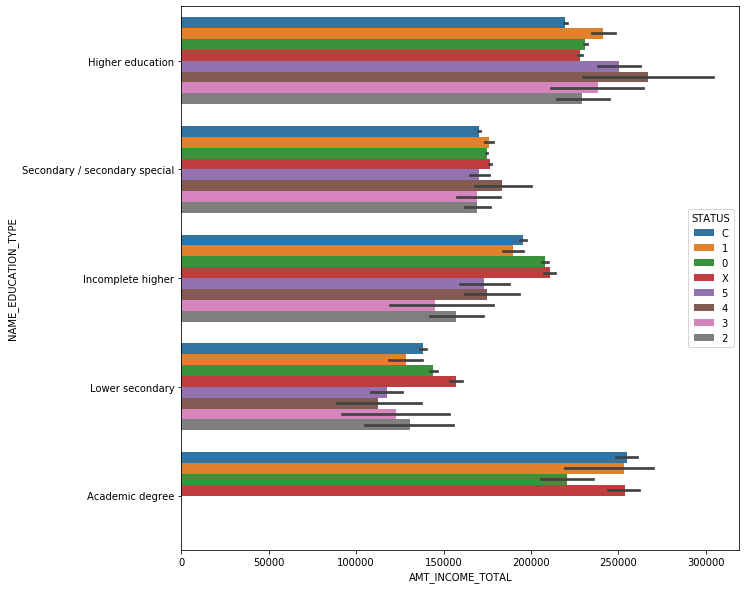

In [19]:
# How do income and education relate to credit status?
plt.figure(figsize=(10,10))
sns.barplot(x="AMT_INCOME_TOTAL", y="NAME_EDUCATION_TYPE", hue="STATUS", data=df)

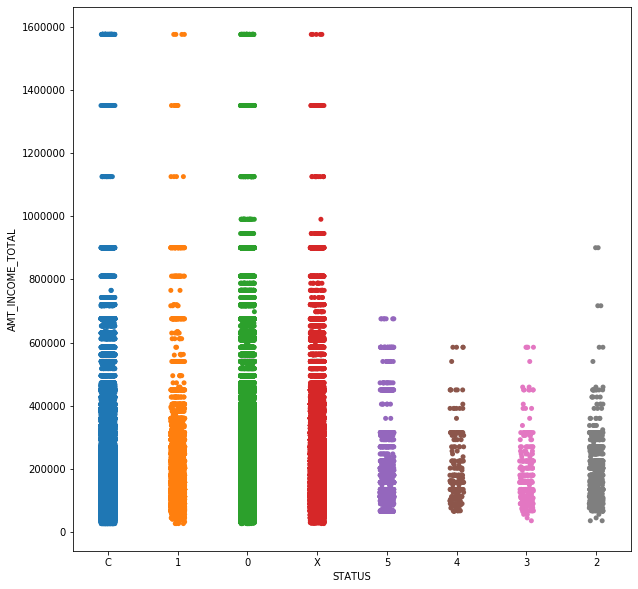

In [20]:
plt.figure(figsize=(10,10))
sns.stripplot(x="STATUS", y="AMT_INCOME_TOTAL", data=df, jitter=True)

<Figure size 360x1080 with 0 Axes>

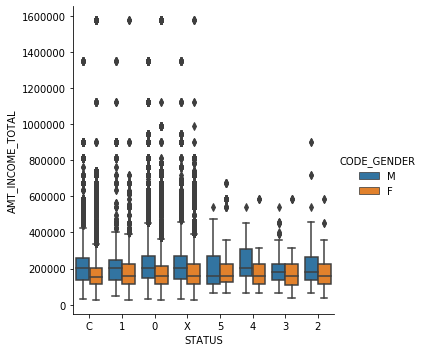

In [21]:
plt.figure(figsize=(5,15))
sns.catplot(x="STATUS", y="AMT_INCOME_TOTAL", hue="CODE_GENDER", kind="box", data=df)

In [22]:
# create subset risky_df to look for relationships within only "high risk"
# "high risk" = at any point in time had status 90 days or more overdue
risky = ['3', '4', '5']
risky_df = df.loc[df['STATUS'].isin(risky)]
risky_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,age,years_working
13663,5009628,F,N,N,0,238500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,0,0,Laborers,2.0,-32,5,52.890411,9.030137
13664,5009628,F,N,N,0,238500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,0,0,Laborers,2.0,-33,5,52.890411,9.030137
13665,5009628,F,N,N,0,238500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,0,0,Laborers,2.0,-34,5,52.890411,9.030137
13666,5009628,F,N,N,0,238500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,0,0,Laborers,2.0,-35,5,52.890411,9.030137
13667,5009628,F,N,N,0,238500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,0,0,Laborers,2.0,-36,4,52.890411,9.030137
13668,5009628,F,N,N,0,238500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,0,0,Laborers,2.0,-37,3,52.890411,9.030137
15900,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,1,1,1,0,NaN,2.0,-31,5,37.142466,1.605479
15901,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,1,1,1,0,NaN,2.0,-32,5,37.142466,1.605479
15902,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,1,1,1,0,NaN,2.0,-33,5,37.142466,1.605479
15903,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,1,1,1,0,NaN,2.0,-34,5,37.142466,1.605479


In [23]:
# narrow down to fields of interest
risky_df = risky_df.drop(columns=['ID', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'MONTHS_BALANCE', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'NAME_FAMILY_STATUS'])
risky_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,age,years_working
13663,F,N,N,0,238500.0,Working,Secondary / secondary special,House / apartment,Laborers,2.0,5,52.890411,9.030137
13664,F,N,N,0,238500.0,Working,Secondary / secondary special,House / apartment,Laborers,2.0,5,52.890411,9.030137
13665,F,N,N,0,238500.0,Working,Secondary / secondary special,House / apartment,Laborers,2.0,5,52.890411,9.030137
13666,F,N,N,0,238500.0,Working,Secondary / secondary special,House / apartment,Laborers,2.0,5,52.890411,9.030137
13667,F,N,N,0,238500.0,Working,Secondary / secondary special,House / apartment,Laborers,2.0,4,52.890411,9.030137


In [24]:
# Can relationships better be identified within "Risky Subset"?

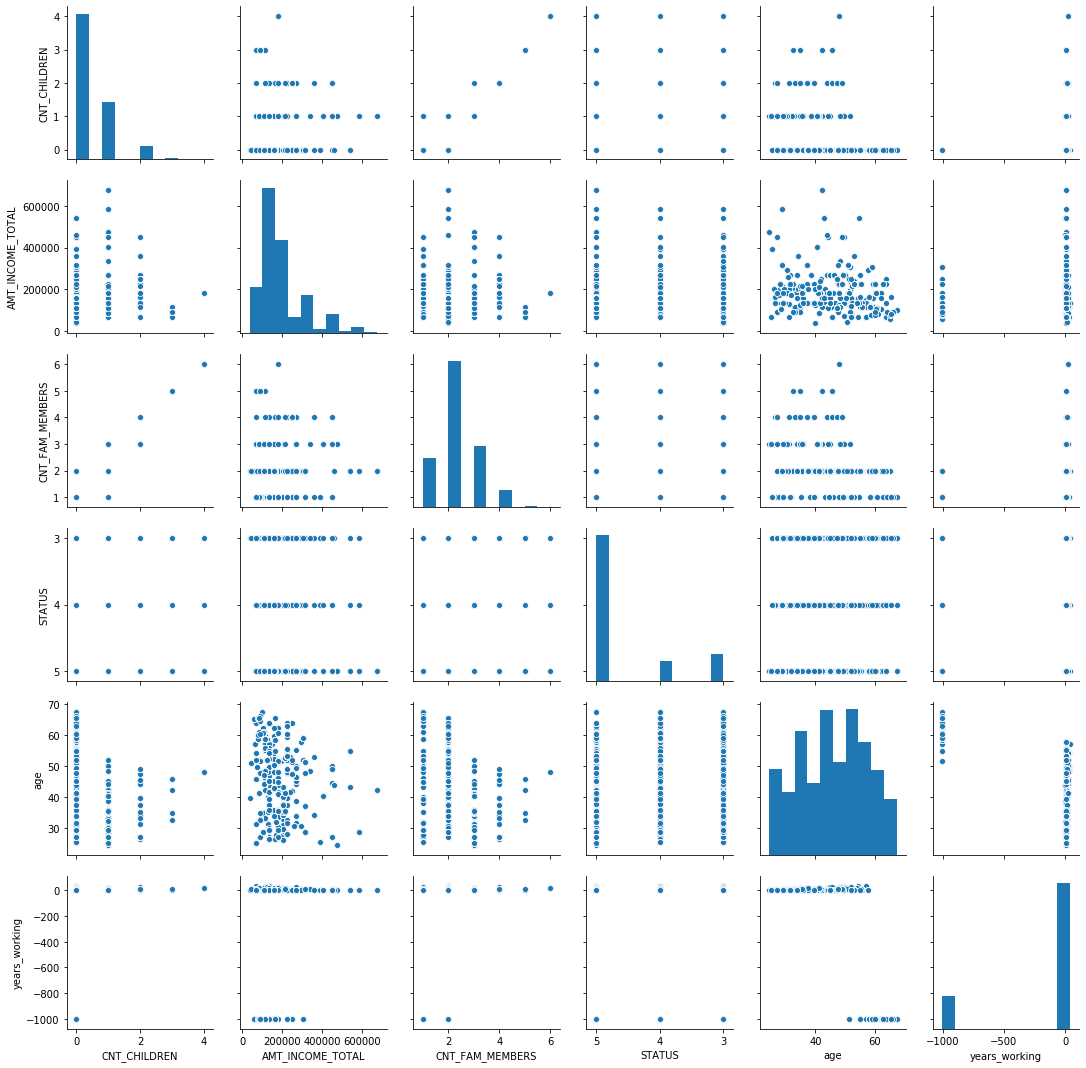

In [25]:
# Within risky subset, where can relationships be identified?
sns.pairplot(risky_df)

<Figure size 720x720 with 0 Axes>

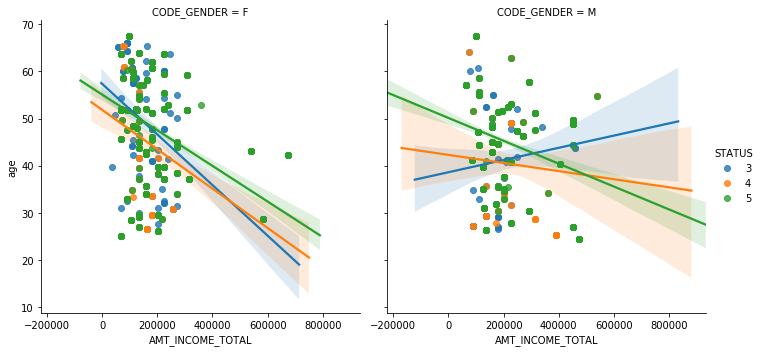

In [26]:
# Within risky subset, what are the relationships between education, income, gender, and credit status?
plt.figure(figsize=(10, 10))
sns.lmplot(x="AMT_INCOME_TOTAL", y="age", hue="STATUS", col="CODE_GENDER", data=risky_df)

# References

https://www.kaggle.com/rikdifos/credit-card-approval-prediction/discussion/119320

https://www.kaggle.com/storrinha/st-00-data-exploration-v1